In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [2]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao.drop('Unnamed: 0', axis=1, inplace=True)
print(previsao.shape)
previsao.head(5)

(15000, 15)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
previsao.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [6]:
posse = previsao[['posse_de_imovel','posse_de_veiculo','renda']]
posse.pivot_table(index=['posse_de_imovel','posse_de_veiculo'], 
                    values='renda', 
                    aggfunc='mean', 
                    margins=True)

renda
posse_de_imovel posse_de_veiculo             
False           False             4135.868139
                True              4865.181090
True            False             4511.636668
                True              5057.200615
All                               4624.632946

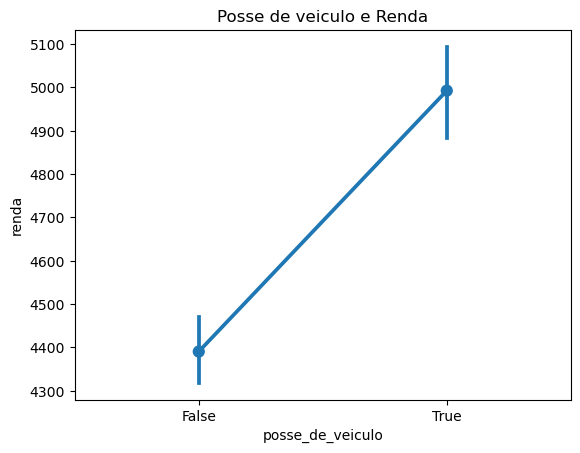

In [8]:
plt.title('Posse de veiculo e Renda')
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=posse, dodge=True, ci = 90)

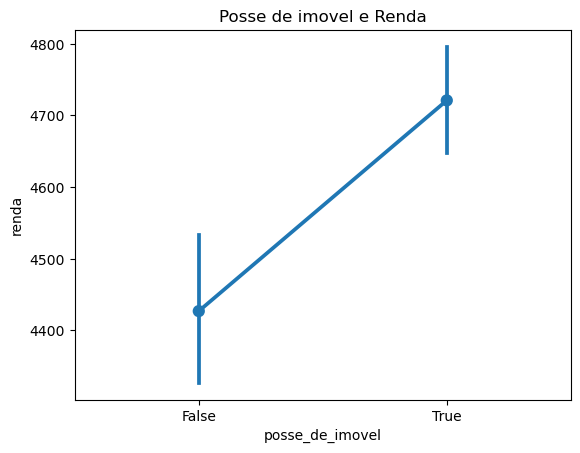

In [12]:
plt.title('Posse de imovel e Renda')
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=posse, dodge=True, ci = 90)

    Ambas parecem boas preditoras de renda, já que estão correlacionadas onde quando True a renda se mostra alta e quando False a renda se mostra baixa